In [1]:
import pandas as pd
import time
from openbb import obb
import pyfolio as pf
from datetime import datetime, timedelta

In [3]:
obb.user.preferences.output_type = "dataframe"

In [5]:
# read the pickle file
perf = pd.read_pickle("D:/AlgoT/Mycode/How-To-Assess-BackTest-Risk-And-Performance-Metrics/mean_reversion.pickle")

In [7]:
display(perf)

,period_open,period_close,net_leverage,short_exposure,long_exposure,returns,starting_value,orders,starting_cash,capital_used,...,period_label,treasury_period_return,trading_days,excess_return,sharpe,max_drawdown,max_leverage,sortino,alpha,beta
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.000000,0.00,0.00,0.000000e+00,0.00,"[{'id': 'f2138e186be44400a459d86e4b773794', 'd...",100000.00000,0.00000,...,2016-01,0.0,1,0.0,NaN,0.000000e+00,0.000000,NaN,NaN,NaN
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,-0.019778,-1977.80,0.00,-1.650000e-07,0.00,"[{'id': 'f2138e186be44400a459d86e4b773794', 'd...",100000.00000,1977.78350,...,2016-01,0.0,2,0.0,-11.224972,-1.650000e-07,0.019778,-11.224972,0.000000,-0.000082
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,-0.019863,-1986.16,0.00,-8.360001e-05,-1977.80,[],101977.78350,0.00000,...,2016-01,0.0,3,0.0,-9.192298,-8.376500e-05,0.019863,-9.183223,-0.001603,0.005824
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,-0.019834,-1983.30,0.00,2.860240e-05,-1986.16,[],101977.78350,0.00000,...,2016-01,0.0,4,0.0,-4.517139,-8.376500e-05,0.019863,-5.237306,-0.003779,-0.000142
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,-0.019866,-1986.38,0.00,-3.080170e-05,-1983.30,[],101977.78350,0.00000,...,2016-01,0.0,5,0.0,-6.398478,-8.596500e-05,0.019866,-6.849915,-0.004494,-0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.057121,-1968.03,7731.93,1.658249e-04,5747.17,[],95142.41300,0.00000,...,2017-12,0.0,499,0.0,0.306637,-1.374345e-02,0.307466,0.395360,0.001123,0.023565
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,0.056489,-1969.14,7665.41,-6.702257e-04,5763.90,"[{'id': '1a35cc3ca1dd4fe89570805c911b9250', 'd...",95142.41300,0.00000,...,2017-12,0.0,500,0.0,0.283994,-1.374345e-02,0.307466,0.366056,0.000788,0.023615
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.000641,-7839.21,7903.90,6.617624e-04,5696.27,"[{'id': '1a35cc3ca1dd4fe89570805c911b9250', 'd...",95142.41300,5698.31125,...,2017-12,0.0,501,0.0,0.305450,-1.374345e-02,0.307466,0.393889,0.001109,0.023621
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.000894,-7814.05,7904.33,2.536038e-04,64.69,[],100840.72425,0.00000,...,2017-12,0.0,502,0.0,0.313499,-1.374345e-02,0.307466,0.404293,0.001211,0.023633


In [9]:
# Use Pyfolio helper function to extract returns, positions, and transactions from the DataFrame
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [11]:
display(returns)

2016-01-04 00:00:00+00:00    0.000000e+00
2016-01-05 00:00:00+00:00   -1.650000e-07
2016-01-06 00:00:00+00:00   -8.360001e-05
2016-01-07 00:00:00+00:00    2.860240e-05
2016-01-08 00:00:00+00:00   -3.080170e-05
                                 ...     
2017-12-22 00:00:00+00:00    1.658249e-04
2017-12-26 00:00:00+00:00   -6.702257e-04
2017-12-27 00:00:00+00:00    6.617624e-04
2017-12-28 00:00:00+00:00    2.536038e-04
2017-12-29 00:00:00+00:00   -1.320704e-04
Name: returns, Length: 503, dtype: float64

In [13]:
display(positions)

sid,Equity(2 [AAL]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(45 [ADBE]),Equity(52 [ADP]),Equity(71 [AET]),Equity(85 [AGN]),Equity(98 [AIG]),Equity(136 [ALXN]),Equity(138 [AMAT]),...,Equity(2952 [UPS]),Equity(2959 [USB]),Equity(3029 [VRX]),Equity(3045 [VZ]),Equity(3056 [WBA]),Equity(3067 [WDC]),Equity(3077 [WFC]),Equity(3079 [WFM]),Equity(3105 [WMT]),cash
index,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-06 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-07 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-11 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1926.22,...,0.0,0.0,0.0,-1968.03,0.0,1936.32,0.00,0.0,0.0,95142.41300
2017-12-26 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1888.85,...,0.0,0.0,0.0,-1969.14,0.0,1920.00,0.00,0.0,0.0,95142.41300
2017-12-27 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,-1950.40,0.0,0.0,100840.72425


In [15]:
# as seen above, remove the equity objects
positions.columns = [ col.symbol for col in positions.columns[:-1]] + ["cash"]

In [17]:
display(positions)

,AAL,AAPL,ABBV,ADBE,ADP,AET,AGN,AIG,ALXN,AMAT,...,UPS,USB,VRX,VZ,WBA,WDC,WFC,WFM,WMT,cash
index,,,,,,,,,,,,,,,,,,,,,
2016-01-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-06 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-07 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
2016-01-11 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,101977.78350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1926.22,...,0.0,0.0,0.0,-1968.03,0.0,1936.32,0.00,0.0,0.0,95142.41300
2017-12-26 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1888.85,...,0.0,0.0,0.0,-1969.14,0.0,1920.00,0.00,0.0,0.0,95142.41300
2017-12-27 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,-1950.40,0.0,0.0,100840.72425


In [19]:
display(transactions)

,sid,symbol,price,order_id,amount,commission,dt,txn_dollars
2016-01-05 21:00:00+00:00,Equity(1228 [GMCR]),Equity(1228 [GMCR]),89.90,f2138e186be44400a459d86e4b773794,-22,None,2016-01-05 21:00:00+00:00,1977.80
2016-01-12 21:00:00+00:00,Equity(1228 [GMCR]),Equity(1228 [GMCR]),90.42,06a4b3f8500b46618a1e6f330b6cca7a,22,None,2016-01-12 21:00:00+00:00,-1989.24
2016-01-12 21:00:00+00:00,Equity(3105 [WMT]),Equity(3105 [WMT]),63.62,82137ba5c93e4d5e9453e1cf6bab1bfe,-31,None,2016-01-12 21:00:00+00:00,1972.22
2016-01-20 21:00:00+00:00,Equity(3105 [WMT]),Equity(3105 [WMT]),60.84,3448557ae98840b9b647f95220529d0d,31,None,2016-01-20 21:00:00+00:00,-1886.04
2016-01-20 21:00:00+00:00,Equity(994 [ESRX]),Equity(994 [ESRX]),71.70,ee4ce9e38e7e44d2aff4fd550bc242ce,27,None,2016-01-20 21:00:00+00:00,-1935.90
...,...,...,...,...,...,...,...,...
2017-12-27 21:00:00+00:00,Equity(2331 [PYPL]),Equity(2331 [PYPL]),74.59,5b259d88a38e464db8505131be8b9f7b,27,None,2017-12-27 21:00:00+00:00,-2013.93
2017-12-27 21:00:00+00:00,Equity(606 [CMCSA]),Equity(606 [CMCSA]),40.41,422b08fc2d1f42bdb8bb57a74071c97c,-49,None,2017-12-27 21:00:00+00:00,1980.09
2017-12-27 21:00:00+00:00,Equity(1063 [FDX]),Equity(1063 [FDX]),250.03,d5aa2593bce24d99a86e8bbfd99dcceb,-8,None,2017-12-27 21:00:00+00:00,2000.24
2017-12-27 21:00:00+00:00,Equity(2945 [UNP]),Equity(2945 [UNP]),136.32,20db1aa978f54a47b3db096102d8492f,-14,None,2017-12-27 21:00:00+00:00,1908.48


In [21]:
# as seen above, fix the symbols columns, by replacing the object with the string representations
transactions.symbol = transactions.symbol.apply( lambda s: s.symbol)

In [23]:
display(transactions)

,sid,symbol,price,order_id,amount,commission,dt,txn_dollars
2016-01-05 21:00:00+00:00,Equity(1228 [GMCR]),GMCR,89.90,f2138e186be44400a459d86e4b773794,-22,None,2016-01-05 21:00:00+00:00,1977.80
2016-01-12 21:00:00+00:00,Equity(1228 [GMCR]),GMCR,90.42,06a4b3f8500b46618a1e6f330b6cca7a,22,None,2016-01-12 21:00:00+00:00,-1989.24
2016-01-12 21:00:00+00:00,Equity(3105 [WMT]),WMT,63.62,82137ba5c93e4d5e9453e1cf6bab1bfe,-31,None,2016-01-12 21:00:00+00:00,1972.22
2016-01-20 21:00:00+00:00,Equity(3105 [WMT]),WMT,60.84,3448557ae98840b9b647f95220529d0d,31,None,2016-01-20 21:00:00+00:00,-1886.04
2016-01-20 21:00:00+00:00,Equity(994 [ESRX]),ESRX,71.70,ee4ce9e38e7e44d2aff4fd550bc242ce,27,None,2016-01-20 21:00:00+00:00,-1935.90
...,...,...,...,...,...,...,...,...
2017-12-27 21:00:00+00:00,Equity(2331 [PYPL]),PYPL,74.59,5b259d88a38e464db8505131be8b9f7b,27,None,2017-12-27 21:00:00+00:00,-2013.93
2017-12-27 21:00:00+00:00,Equity(606 [CMCSA]),CMCSA,40.41,422b08fc2d1f42bdb8bb57a74071c97c,-49,None,2017-12-27 21:00:00+00:00,1980.09
2017-12-27 21:00:00+00:00,Equity(1063 [FDX]),FDX,250.03,d5aa2593bce24d99a86e8bbfd99dcceb,-8,None,2017-12-27 21:00:00+00:00,2000.24
2017-12-27 21:00:00+00:00,Equity(2945 [UNP]),UNP,136.32,20db1aa978f54a47b3db096102d8492f,-14,None,2017-12-27 21:00:00+00:00,1908.48


In [25]:
# take the symbols column from positions & use the OpenBB platform screener to download an overview for each one
symbols = positions.columns[:-1].tolist()

In [27]:
# Add Microsoft as Activision replacement if neeed
# Activision Blizzard was bought by microsoft and we couldn't access the stock data
symbols = ['MSFT' if x == 'AVTI' else x for x in symbols]

In [29]:
from datetime import datetime, timedelta

def validate_symbol(symbol):
    """Robust validation with proper date formatting"""
    try:
        # Use 1-year back from current date
        end_date = datetime.now()
        start_date = end_date - timedelta(days=365)
        
        # Convert symbol format for Yahoo Finance
        formatted_symbol = symbol.replace("_", "-")
        
        # Test with 1-year data range
        obb.equity.price.historical(
            formatted_symbol,
            start_date=start_date.strftime("%Y-%m-%d"),  # Correct format
            end_date=end_date.strftime("%Y-%m-%d"),      # Correct format
            provider="yfinance"
        )
        return True
    except Exception as e:
        print(f"Validation failed for {symbol}: {str(e)}")
        return False

# Updated symbol processing
symbols = positions.columns[:-1].tolist()

# Fix symbol formatting first
symbols = [s.replace("_", "-") for s in symbols]

# Handle known acquisitions/rebrands
symbol_replacements = {
    "ATVI": "MSFT",
    "FB": "META",
    "TWTR": None,  # Add to exclusion list if delisted/private
    "BRK-B": "BRK-B",  # Ensure proper formatting
}
symbols = [symbol_replacements.get(s, s) for s in symbols if symbol_replacements.get(s, s)]

# Validate symbols with corrected function
valid_symbols = [s for s in symbols if validate_symbol(s)]

print(f"Final valid symbols: {valid_symbols}")




1 Failed download:
['AET']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for AET: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['AGN']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for AGN: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['ALXN']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for ALXN: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['ANTM']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for ANTM: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['ARIA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for ARIA: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['BCR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for BCR: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['CCE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for CCE: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['CELG']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for CELG: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['COL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for COL: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['ESRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for ESRX: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['GMCR']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for GMCR: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['LNKD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for LNKD: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['MJN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for MJN: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['MON']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for MON: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['MRO']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for MRO: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['MYL']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for MYL: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['PCLN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for PCLN: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['PNRA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for PNRA: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['PXD']: YFTzMissingError('possibly delisted; no timezone found')


Validation failed for PXD: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['RAI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for RAI: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['SNI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for SNI: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['STJ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for STJ: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['TWX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for TWX: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['VRX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for VRX: 
[Empty] -> No results found. Try adjusting the query parameters.



1 Failed download:
['WFM']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-01 -> 2025-04-01)')


Validation failed for WFM: 
[Empty] -> No results found. Try adjusting the query parameters.
Final valid symbols: ['AAL', 'AAPL', 'ABBV', 'ADBE', 'ADP', 'AIG', 'AMAT', 'AMGN', 'AMZN', 'MSFT', 'AVGO', 'AXP', 'AZO', 'BA', 'BBY', 'BIDU', 'BIIB', 'BMY', 'BRK-B', 'CHTR', 'CL', 'CMCSA', 'CMG', 'COST', 'CSCO', 'CSX', 'CTSH', 'CVS', 'DAL', 'DE', 'DG', 'DVN', 'EA', 'EBAY', 'EFX', 'EXPE', 'F', 'META', 'FDX', 'GE', 'GILD', 'GM', 'GOOG', 'GS', 'HAL', 'HD', 'HON', 'HUM', 'IBM', 'INCY', 'INTC', 'ISRG', 'JNJ', 'KMI', 'KO', 'KR', 'LLY', 'LMT', 'LOW', 'LRCX', 'M', 'MA', 'MCD', 'MCK', 'MDLZ', 'MDT', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'MU', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'ORLY', 'OXY', 'PANW', 'PCG', 'PEP', 'PFE', 'PG', 'PM', 'PRGO', 'PYPL', 'QCOM', 'REGN', 'SBUX', 'SCHW', 'SLB', 'SRPT', 'SYF', 'T', 'TDG', 'TGT', 'TJX', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'VZ', 'WBA', 'WDC', 'WFC', 'WMT']


In [31]:
# Batch dowload with error handling
screener_data = pd.DataFrame()

for symbol in valid_symbols:
    try:
        df = obb.equity.profile(symbol, provider="yfinance")
        screener_data = pd.concat([screener_data, df])
        time.sleep(0.5) # Rate limit protection, so Yahoo Finance doesn't block your requests
    except Exception as e:
        print(f"Error retrieving {symbol}: {str(e)}")

In [33]:
display(screener_data)

,symbol,name,stock_exchange,long_description,company_url,business_phone_no,hq_address1,hq_address_city,hq_address_postal_code,hq_state,...,industry_category,issue_type,currency,market_cap,shares_outstanding,shares_float,shares_implied_outstanding,shares_short,beta,dividend_yield
0,AAL,American Airlines Group Inc.,NMS,"American Airlines Group Inc., through its subs...",https://www.americanairlines.in/intl/in/index.jsp,682 278 9000,1 Skyview Drive,Fort Worth,76155,TX,...,Airlines,EQUITY,USD,6648093184,657576000,647830312,667558016,58688463,1.270,NaN
0,AAPL,Apple Inc.,NMS,"Apple Inc. designs, manufactures, and markets ...",https://www.apple.com,(408) 996-1010,One Apple Park Way,Cupertino,95014,CA,...,Consumer Electronics,EQUITY,USD,3338778968064,15022100480,14998187904,15172599808,129678474,1.178,0.45
0,ABBV,AbbVie Inc.,NYQ,"AbbVie Inc., a research-based biopharmaceutica...",https://www.abbvie.com,847 932 7900,1 North Waukegan Road,North Chicago,60064-6400,IL,...,Drug Manufacturers - General,EQUITY,USD,372511801344,1768979968,1761418118,1768979968,19695617,0.598,3.13
0,ADBE,Adobe Inc.,NMS,"Adobe Inc., together with its subsidiaries, op...",https://www.adobe.com,408 536 6000,345 Park Avenue,San Jose,95110-2704,CA,...,Software - Application,EQUITY,USD,160843628544,426200000,425019426,426200000,8195415,1.370,NaN
0,ADP,"Automatic Data Processing, Inc.",NMS,"Automatic Data Processing, Inc. engages in the...",https://www.adp.com,973 974 5000,One ADP Boulevard,Roseland,07068,NJ,...,Software - Application,EQUITY,USD,124335710208,406871008,405971708,406871008,5639486,0.777,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,VZ,Verizon Communications Inc.,NYQ,"Verizon Communications Inc., through its subsi...",https://www.verizon.com,212 395 1000,1095 Avenue of the Americas,New York,10036,NY,...,Telecom Services,EQUITY,USD,190552080384,4209700096,4203852469,4209700096,79264272,0.396,5.97
0,WBA,"Walgreens Boots Alliance, Inc.",NMS,"Walgreens Boots Alliance, Inc. operates as a h...",https://www.walgreensbootsalliance.com,847 315 3700,108 Wilmot Road,Deerfield,60015,IL,...,Pharmaceutical Retailers,EQUITY,USD,9620176896,864734976,714542578,866284032,45952390,0.598,8.95
0,WDC,Western Digital Corporation,NMS,"Western Digital Corporation develops, manufact...",https://www.westerndigital.com,408-801-1000,5601 Great Oaks Parkway,San Jose,95119,CA,...,Computer Hardware,EQUITY,USD,14046871552,347824000,344891747,347824000,33483340,1.457,NaN
0,WFC,Wells Fargo & Company,NYQ,"Wells Fargo & Company, a financial services co...",https://www.wellsfargo.com,415-371-2921,420 Montgomery Street,San Francisco,94104,CA,...,Banks - Diversified,EQUITY,USD,231173341184,3265159936,3280426462,3318919936,35408898,1.156,2.23


In [35]:
# a mapping between each symbol and sector
sector_map = (
    screener_data[["symbol", "sector"]]
    .drop_duplicates(subset="symbol")
    .set_index("symbol")
    .reindex(symbols)
    .fillna("Unknown")
    .to_dict() ["sector"]
)

In [37]:
display(sector_map)

{'AAL': 'Industrials',
 'AAPL': 'Technology',
 'ABBV': 'Healthcare',
 'ADBE': 'Technology',
 'ADP': 'Technology',
 'AET': 'Unknown',
 'AGN': 'Unknown',
 'AIG': 'Financial Services',
 'ALXN': 'Unknown',
 'AMAT': 'Technology',
 'AMGN': 'Healthcare',
 'AMZN': 'Consumer Cyclical',
 'ANTM': 'Unknown',
 'ARIA': 'Unknown',
 'MSFT': 'Technology',
 'AVGO': 'Technology',
 'AXP': 'Financial Services',
 'AZO': 'Consumer Cyclical',
 'BA': 'Industrials',
 'BBY': 'Consumer Cyclical',
 'BCR': 'Unknown',
 'BIDU': 'Communication Services',
 'BIIB': 'Healthcare',
 'BMY': 'Healthcare',
 'BRK-B': 'Financial Services',
 'CCE': 'Unknown',
 'CELG': 'Unknown',
 'CHTR': 'Communication Services',
 'CL': 'Consumer Defensive',
 'CMCSA': 'Communication Services',
 'CMG': 'Consumer Cyclical',
 'COL': 'Unknown',
 'COST': 'Consumer Defensive',
 'CSCO': 'Technology',
 'CSX': 'Industrials',
 'CTSH': 'Technology',
 'CVS': 'Healthcare',
 'DAL': 'Industrials',
 'DE': 'Industrials',
 'DG': 'Consumer Defensive',
 'DVN': 'Ene

In [39]:
# load price data for our benchmark
spy = obb.equity.price.historical(
    "SPY",
    start_date=returns.index.min(),
    end_date=returns.index.max()
)
spy.index = pd.to_datetime(spy.index)
benchmark_returns = spy.close.pct_change()
benchmark_returns.name = "SPY"
benchmark_returns = benchmark_returns.tz_localize("UTC").filter(returns.index)

<Axes: ylabel='Cumulative returns'>

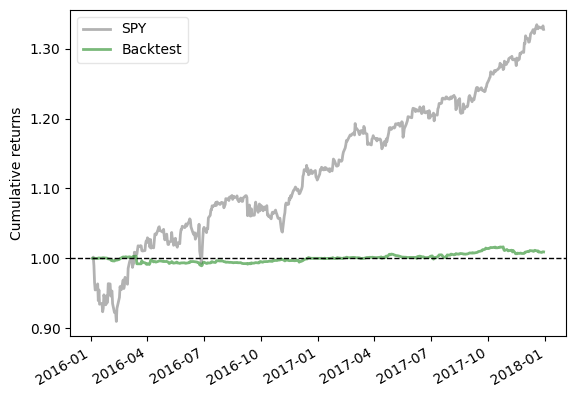

In [43]:
# plot the strategy's equity curve against the benchmark
pf.plotting.plot_rolling_returns(
    returns,
    factor_returns=benchmark_returns
)

<Axes: >

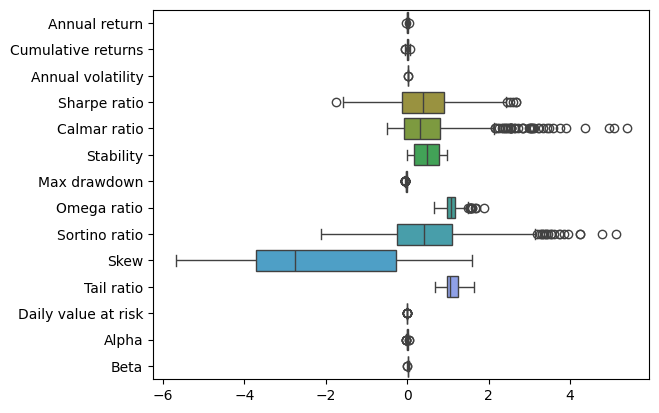

In [45]:
# summarize the distribution of key performance indicators
pf.plotting.plot_perf_stats(
    returns=returns,
    factor_returns=benchmark_returns,
)

In [49]:
# a detailed outline of the strategy's performance metrics
pf.plotting.show_perf_stats(
    returns,
    factor_returns=benchmark_returns,
    positions=positions,
    transactions=transactions,
    live_start_date="2017-01-01"
)

D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.005%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.926%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.459%' has dtype incompatible with float64, p

<Axes: title={'center': 'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

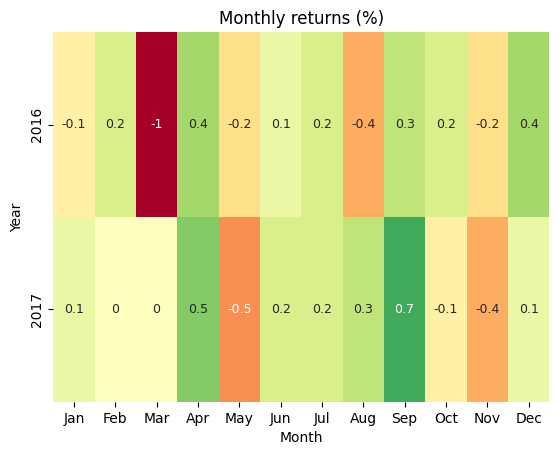

In [51]:
# a heatmap of the strategy's monthly returns
pf.plotting.plot_monthly_returns_heatmap(returns)

<Axes: title={'center': 'Annual returns'}, xlabel='Returns', ylabel='Year'>

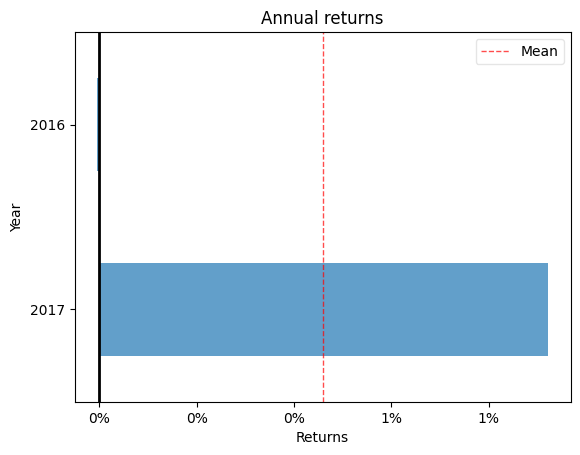

In [53]:
# a bar chart of the strategy's annual returns
pf.plotting.plot_annual_returns(returns)

<Axes: title={'center': 'Distribution of monthly returns'}, xlabel='Returns', ylabel='Number of months'>

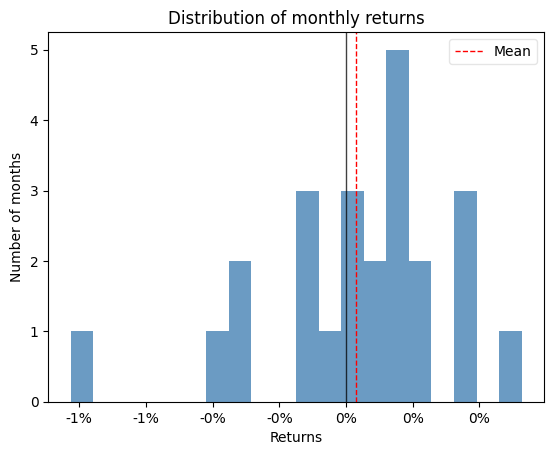

In [55]:
pf.plotting.plot_monthly_returns_dist(returns)

<Axes: ylabel='Returns'>

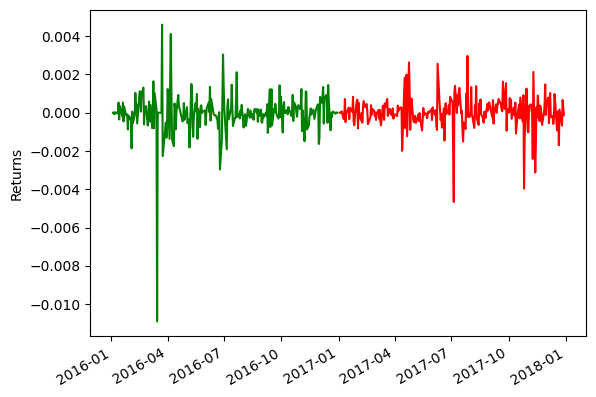

In [59]:
# visualize the strategy's daily returns through time
pf.plotting.plot_returns(
    returns,
    live_start_date="2017-01-01"
)

D:\Anaconda\An\envs\my-quant-stack\lib\site-packages\pyfolio\plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


<Axes: title={'center': 'Return quantiles'}>

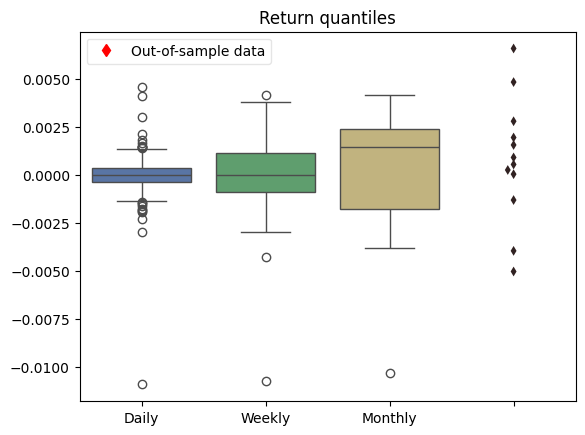

In [65]:
# visualize the return series in quantiles and their cumulative returns for each quantile
pf.plotting.plot_return_quantiles(returns, live_start_date="2017-01-01")